# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [1]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

# Imports

In [2]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [3]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data
df = pd.read_csv("s3://mds-s3-11-sneha/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [4]:
## Use your ML skills to get from step 1 to step 6
df = df.dropna()
df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,35.579336,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520,1.190141e+00,1.015323e-04,4.014984,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

In [6]:
train_df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
count,36816.000000,36816.000000,3.681600e+04,36816.000000,36816.000000,36816.000000,3.681600e+04,3.681600e+04,36816.000000,3.681600e+04,...,3.681600e+04,3.681600e+04,3.681600e+04,3.681600e+04,3.681600e+04,36816.000000,36816.000000,3.681600e+04,3.681600e+04,36816.000000
mean,2.435598,2.911161,3.685100e+00,2.195160,2.771609,3.116934,3.591418e+00,3.490604e+00,2.950611,2.559451e+00,...,3.175946e+00,1.328797e+00,2.048747e+00,1.536491e+00,1.752144e+00,2.451512,2.909697,3.391212e+00,3.403765e+00,2.736204
std,6.876014,6.951689,7.227256e+00,6.502536,6.051221,6.466975,7.392305e+00,7.076361e+00,7.074549,5.739063e+00,...,6.883672e+00,4.955151e+00,5.375858e+00,4.993425e+00,4.937174e+00,5.796878,7.173033,7.960724e+00,7.525256e+00,8.108492
min,0.000000,0.000000,9.161142e-14,0.000000,0.000000,0.000000,-3.479596e-18,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.089808e-13,9.155419e-14,9.479186e-33,1.426891e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.053584,0.021379,2.819840e-02,0.000518,0.002370,0.138181,8.941694e-02,9.016145e-02,0.022656,1.192093e-02,...,1.005828e-04,1.270362e-13,1.352331e-13,5.353678e-05,1.862711e-13,0.005547,0.010028,3.754041e-02,4.883792e-02,0.008082
50%,0.191574,0.494985,5.851130e-01,0.096505,0.295341,0.643671,8.435672e-01,8.216741e-01,0.348699,4.261732e-01,...,2.054757e-01,1.752656e-03,1.146820e-01,3.193842e-02,5.167065e-02,0.167970,0.256126,6.540263e-01,6.658721e-01,0.164671
75%,1.435693,2.398416,3.571731e+00,1.323656,2.508854,3.219543,3.724556e+00,3.630505e+00,2.615149,2.294516e+00,...,2.685723e+00,3.616506e-01,1.183620e+00,6.686751e-01,7.920023e-01,1.819091,2.502725,3.271716e+00,3.217312e+00,1.652147
max,149.967634,157.605713,8.946575e+01,134.465223,87.134722,124.952390,1.401478e+02,1.375916e+02,135.569753,1.342262e+02,...,9.306766e+01,1.095008e+02,8.005998e+01,1.016900e+02,8.045783e+01,103.367212,163.164524,1.549718e+02,1.673562e+02,192.933030


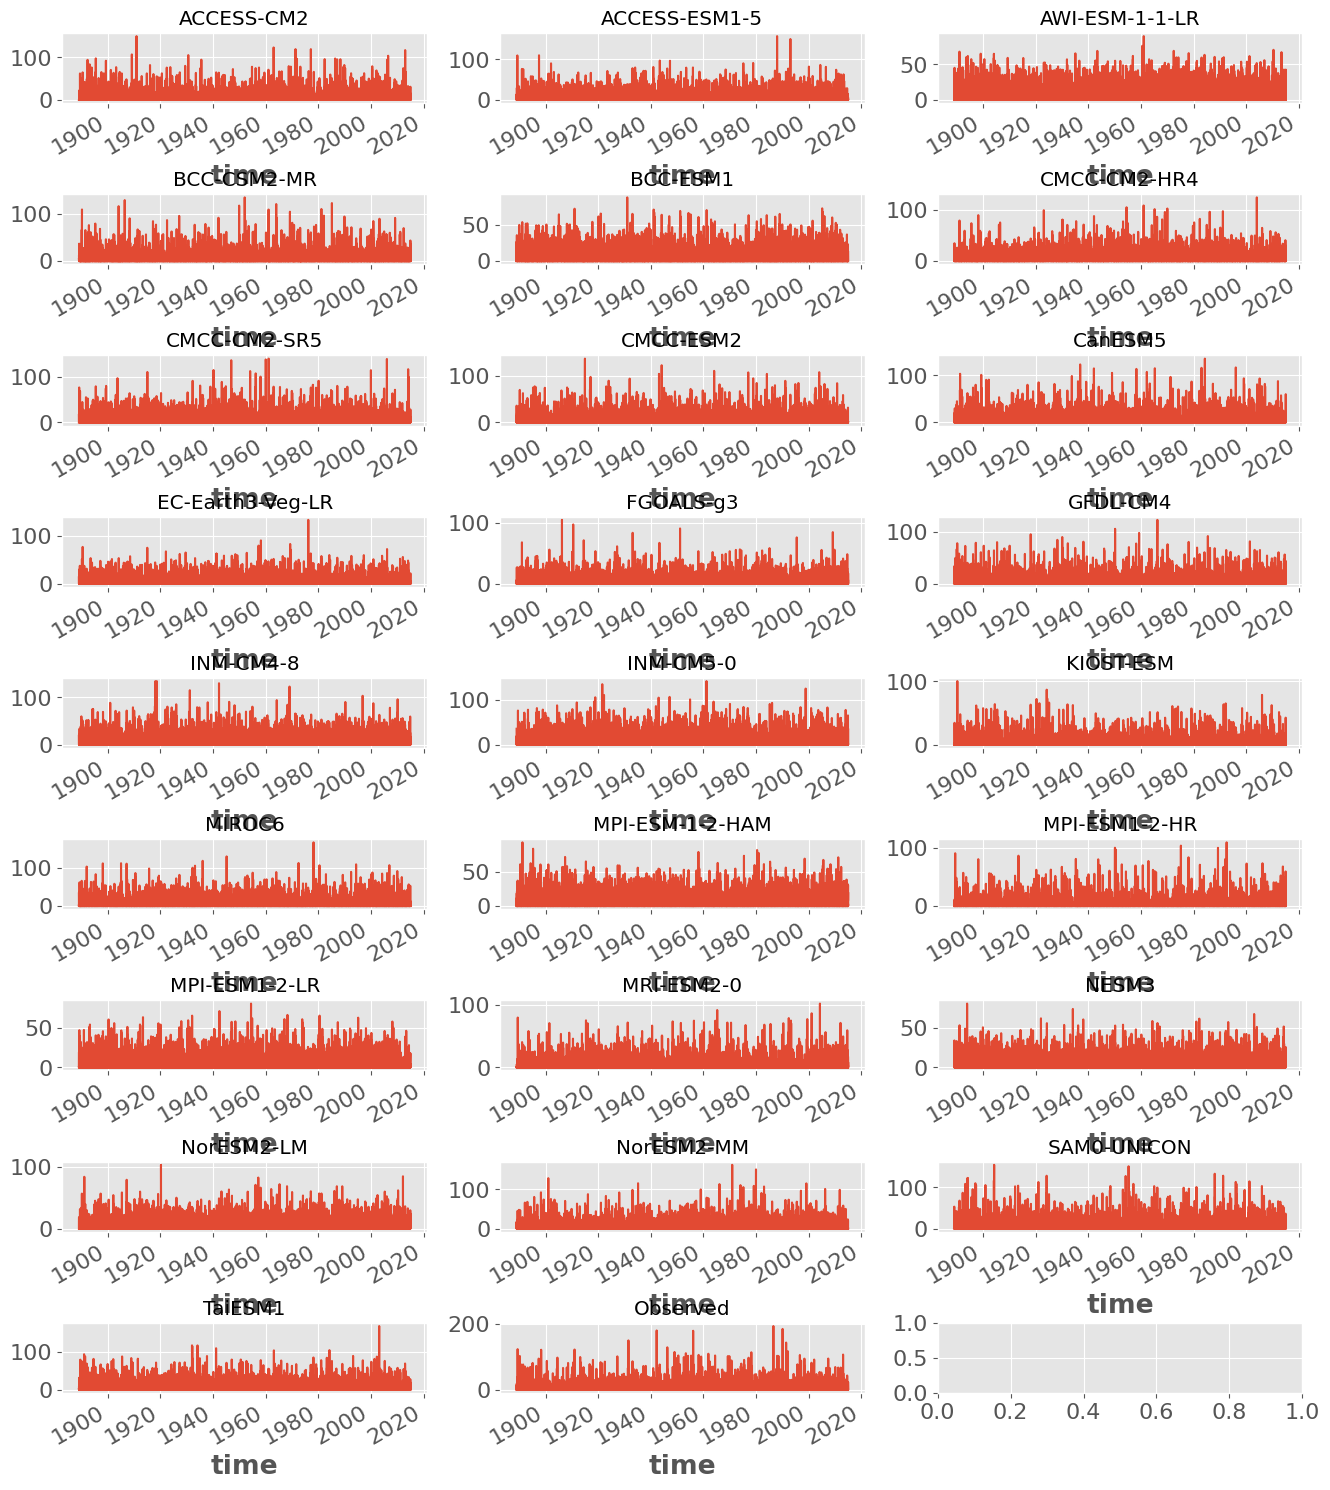

In [7]:
fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(16, 20))
plt.rcParams.update({'font.size': 10})
plt.subplots_adjust(hspace=1.3)
for i, model in enumerate(train_df.columns):
    train_df[[model]].plot(
        title = model,
        ax=axs[i//3, i%3],
        legend = False
        )

In [8]:
X_train, y_train = train_df.drop(columns=['Observed']), train_df['Observed']
X_test, y_test = test_df.drop(columns=['Observed']), test_df['Observed']
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 3.16
 Test RMSE: 8.71


In [10]:
rmse = []
models = df.drop(columns=['Observed']).columns.to_list()
for model in models:
    rmse.append(mean_squared_error(df['Observed'], df[model], squared=False))
pd.DataFrame(rmse, index=models, columns=['RMSE'])


,RMSE
ACCESS-CM2,10.662033
ACCESS-ESM1-5,10.653406
AWI-ESM-1-1-LR,10.899508
BCC-CSM2-MR,10.388781
BCC-ESM1,10.181549
CMCC-CM2-HR4,10.411039
CMCC-CM2-SR5,11.045339
CMCC-ESM2,10.820765
CanESM5,10.688662
EC-Earth3-Veg-LR,10.016441


The ensemble model performed better than all the individual models. The ensemble model had a train RMSE of 3.13, and a test RMSE of 8.71, while the individual models had RMSEs between 9 and 13.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [11]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [12]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.92
 Test RMSE: 8.51


In [13]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.